In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
# Define path to files
# For MacOS
PATH = "C:\\Users\\nafissaad\\Finance\\Stock List\\"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2022-02-04"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [3]:
stocks_not_downloaded = []
missing_stocks = []

In [4]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)

895

In [5]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

In [6]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    #print(mult_df)
    
    for x in tickers:
        df = get_df_from_csv(x)
        #print(df)
        mask = (df.index >= sdate) & (df.index <= edate)
        #print(mask)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [7]:
#port_list = ['GNRC','DXCM','AMD','NFLX','COST','TGT','AES','MSCI','NEM','AMT','HES']

In [8]:
port_list = ["GNRC",'CPRT','ODFL',"AMD", "PAYC","CHTR",
            "MKC", "PG",
            "PGR",'NEM','CCI'
            ]
num_stocks = len(port_list)
num_stocks

11

In [9]:
mult_df = merge_df_by_column_name('Adj Close',  '2018-01-01', 
                                  '2022-02-04', *port_list)
mult_df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
Date,,,,,,,,,,,
2018-01-02,48.029999,43.599998,88.341873,10.98,80.440002,348.970001,47.579823,80.641121,46.956581,34.176991,95.263092
2018-01-03,49.730000,43.389999,88.433861,11.55,81.029999,353.029999,47.692631,80.543282,46.931129,33.890396,94.860809
2018-01-04,50.070000,43.740002,88.952980,12.12,83.110001,349.790009,47.993431,81.112595,46.922638,34.266548,93.758881
2018-01-05,50.410000,43.529999,89.761230,11.88,83.879997,350.880005,48.463459,81.165970,47.100765,34.391945,94.476028
2018-01-08,49.529999,43.549999,90.654900,12.28,84.639999,356.549988,48.515163,81.592972,47.244961,34.356113,94.755859
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,291.359985,NaN,312.429993,NaN,329.760010,581.299988,96.059998,161.130005,107.629997,64.949997,183.190002
2022-01-20,284.109985,NaN,306.989990,NaN,328.269989,572.159973,95.339996,162.000000,107.169998,63.840000,181.649994
2022-01-21,271.160004,NaN,296.809998,NaN,310.000000,569.690002,95.709999,162.619995,108.019997,63.090000,182.250000


In [10]:
mult_df/mult_df.iloc[0]

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
Date,,,,,,,,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-03,1.035395,0.995184,1.001041,1.051913,1.007335,1.011634,1.002371,0.998787,0.999458,0.991614,0.995777
2018-01-04,1.042473,1.003211,1.006918,1.103825,1.033192,1.002350,1.008693,1.005847,0.999277,1.002620,0.984210
2018-01-05,1.049552,0.998395,1.016067,1.081967,1.042765,1.005473,1.018572,1.006508,1.003071,1.006289,0.991738
2018-01-08,1.031230,0.998853,1.026183,1.118397,1.052213,1.021721,1.019658,1.011804,1.006141,1.005241,0.994675
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,6.066208,NaN,3.536601,NaN,4.099453,1.665759,2.018923,1.998112,2.292117,1.900401,1.922990
2022-01-20,5.915261,NaN,3.475022,NaN,4.080930,1.639568,2.003790,2.008901,2.282321,1.867923,1.906824
2022-01-21,5.645638,NaN,3.359788,NaN,3.853804,1.632490,2.011567,2.016589,2.300423,1.845979,1.913123


In [11]:
49.730000/48.029999

1.0353945666332411

In [12]:
50.070000/48.029999

1.0424734757958252

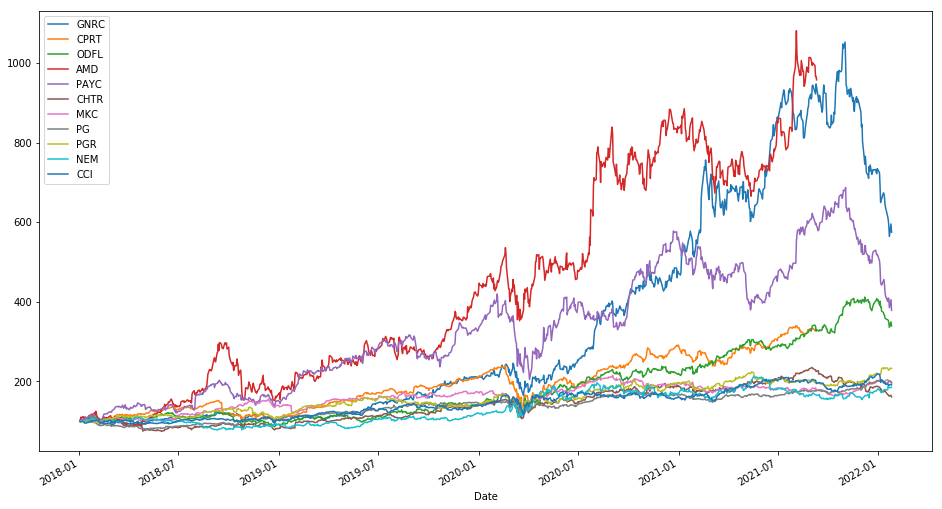

In [13]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))
plt.show()

In [14]:
#Mean Return
returns=np.log(mult_df/mult_df.shift(1))
mean_ret = returns.mean() * 252#252 annual trading days
mean_ret#it could be go up or down by 60%

GNRC    0.431019
CPRT    0.322634
ODFL    0.301136
AMD     0.612989
PAYC    0.328048
CHTR    0.118056
MKC     0.165144
PG      0.168070
PGR     0.208121
NEM     0.151785
CCI     0.159712
dtype: float64

In [15]:
#Returns covariance 
returns.cov()*252

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
GNRC,0.159099,0.061872,0.058104,0.086128,0.088167,0.040792,0.029436,0.025795,0.038117,0.022074,0.041262
CPRT,0.061872,0.099474,0.051249,0.066875,0.086455,0.038104,0.029275,0.026565,0.031790,0.017847,0.035032
ODFL,0.058104,0.051249,0.098081,0.065228,0.062091,0.032967,0.026423,0.022195,0.035285,0.013992,0.030085
AMD,0.086128,0.066875,0.065228,0.310658,0.115422,0.056400,0.035772,0.031766,0.043854,0.035276,0.043275
PAYC,0.088167,0.086455,0.062091,0.115422,0.220489,0.049372,0.037211,0.030485,0.050533,0.019492,0.056496
CHTR,0.040792,0.038104,0.032967,0.056400,0.049372,0.083678,0.022395,0.024152,0.027292,0.014724,0.034052
MKC,0.029436,0.029275,0.026423,0.035772,0.037211,0.022395,0.064181,0.031992,0.028917,0.018393,0.036963
PG,0.025795,0.026565,0.022195,0.031766,0.030485,0.024152,0.031992,0.047254,0.028067,0.012404,0.032187
PGR,0.038117,0.031790,0.035285,0.043854,0.050533,0.027292,0.028917,0.028067,0.070780,0.012854,0.033829
NEM,0.022074,0.017847,0.013992,0.035276,0.019492,0.014724,0.018393,0.012404,0.012854,0.103916,0.019355


In [16]:
returns.corr()

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
GNRC,1.000000,0.493966,0.465132,0.389100,0.470740,0.353539,0.291299,0.297501,0.359192,0.171674,0.377973
CPRT,0.493966,1.000000,0.510928,0.380425,0.576007,0.415328,0.356063,0.377611,0.370832,0.173258,0.400103
ODFL,0.465132,0.510928,1.000000,0.367978,0.422223,0.363903,0.333028,0.326022,0.423483,0.138593,0.350994
AMD,0.389100,0.380425,0.367978,1.000000,0.435149,0.347874,0.246194,0.255506,0.289471,0.193784,0.279673
PAYC,0.470740,0.576007,0.422223,0.435149,1.000000,0.363478,0.312803,0.298656,0.404507,0.128769,0.439605
CHTR,0.353539,0.415328,0.363903,0.347874,0.363478,1.000000,0.305593,0.384076,0.354631,0.157893,0.430103
MKC,0.291299,0.356063,0.333028,0.246194,0.312803,0.305593,1.000000,0.580920,0.429034,0.225220,0.533092
PG,0.297501,0.377611,0.326022,0.255506,0.298656,0.384076,0.580920,1.000000,0.485316,0.177008,0.541005
PGR,0.359192,0.370832,0.423483,0.289471,0.404507,0.354631,0.429034,0.485316,1.000000,0.149878,0.464591
NEM,0.171674,0.173258,0.138593,0.193784,0.128769,0.157893,0.225220,0.177008,0.149878,1.000000,0.219377


In [17]:
#Generate random weights equal to 1
weights = np.random.random(11)
weights /= np.sum(weights)#Devide weight devided by weights ammount
print('Weights :',weights)
print('Totak Weights :',np.sum(weights))

Weights : [0.0044284  0.03535402 0.12708534 0.07221348 0.00523635 0.17444512
 0.12991157 0.11025229 0.12726863 0.10647924 0.10732556]
Totak Weights : 1.0


In [18]:
#Calculate Return of our Portfolio
np.sum(weights*returns.mean())*252

0.2179379111102562

In [19]:
# Calculate volatility or portfolio risk
np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))

0.19266589371171697

In [20]:
#Analyzing Return and risk of 20000 Combitations
risk_free_rate = 0.0125
p_ret = []#Return list
p_vol = []#volatility list
p_SR =[]#sharp ratio best return at lower risk
p_wt =[]#weightings

for x in range(20000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.31458845, 0.29110289, 0.30062122, ..., 0.29842845, 0.22843948,
        0.22077076]),
 array([0.24301852, 0.24006148, 0.24313319, ..., 0.23635484, 0.19624972,
        0.19691642]),
 array([1.24306764, 1.16054809, 1.1850345 , ..., 1.20974232, 1.10033012,
        1.05766071]),
 array([[0.18954148, 0.12654106, 0.0516092 , ..., 0.04251314, 0.09102843,
         0.02674256],
        [0.0782648 , 0.05678989, 0.12534711, ..., 0.14403153, 0.01390616,
         0.10739933],
        [0.11036741, 0.13239036, 0.02666807, ..., 0.07711523, 0.10915052,
         0.06097136],
        ...,
        [0.09116167, 0.13718442, 0.13925504, ..., 0.13001372, 0.00547722,
         0.08657139],
        [0.10978745, 0.02984585, 0.00646814, ..., 0.13553728, 0.15602264,
         0.14148014],
        [0.06782479, 0.03023145, 0.18447273, ..., 0.00634821, 0.17598797,
         0.06862718]]))

In [21]:
len(p_ret)

20000

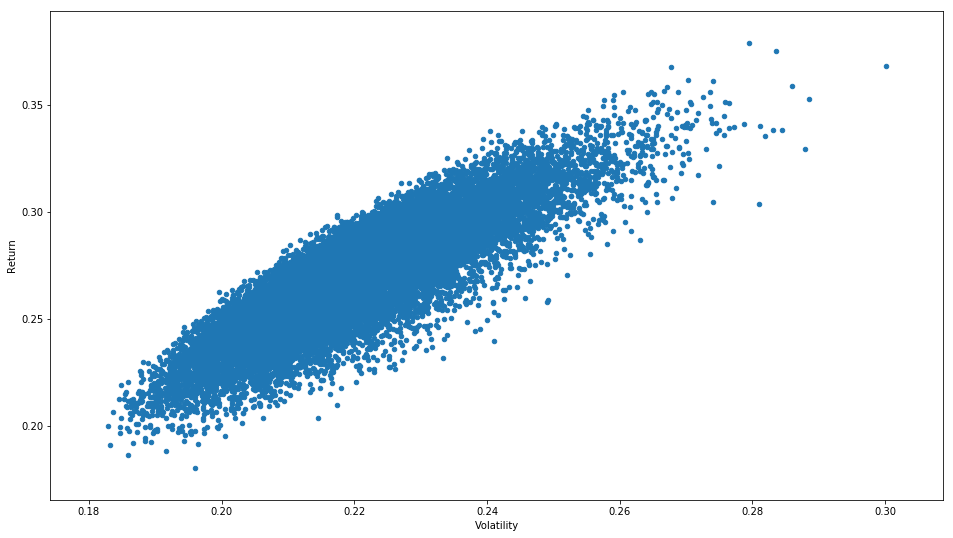

In [22]:
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))
plt.show()

In [23]:
SR_index=np.argmax(p_SR)# which number index has maximum Sarp ratio
i = 0
while i < 11:
    print('Stock : %s : %2.2f' %(port_list[i],(p_wt[SR_index][i]*100)))#port list = stocks tickers, p_weight
    i += 1
print('\nVolatility :',p_vol[SR_index])
print('\nReturn :',p_ret[SR_index])

Stock : GNRC : 18.53
Stock : CPRT : 17.78
Stock : ODFL : 12.85
Stock : AMD : 16.16
Stock : PAYC : 0.23
Stock : CHTR : 0.18
Stock : MKC : 4.07
Stock : PG : 10.41
Stock : PGR : 13.94
Stock : NEM : 5.33
Stock : CCI : 0.53

Volatility : 0.24038141205291189

Return : 0.3380829316135166


In [24]:
26.63+14.69+1.09+1.09+19.19+23.95+1.95+5.12+5.59+0.35+0.35

100.00000000000001

In [25]:
len(p_SR)

20000

In [26]:
SR_index

19357

In [27]:
wt=p_wt[SR_index].tolist()
wt

[0.18526813882288587,
 0.1777668712941956,
 0.12851087746581802,
 0.1615760644760385,
 0.002293169171862111,
 0.0017530133147692808,
 0.040665430022868855,
 0.10410957942445231,
 0.1394252480134651,
 0.053317549422113,
 0.005314058571531217]

In [28]:
p_wt[SR_index].sum()

0.9999999999999999

In [29]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", 
             "PG", "PGR", "NEM", "CCI"]

In [30]:
port_df_start = merge_df_by_column_name('Adj Close',  '2020-01-02', 
                                  '2020-01-02', *port_list)
price=port_df_start.values
price

array([[102.01000214,  93.48000336, 127.20014954,  49.09999847,
        271.79998779, 490.42999268,  81.26832581, 116.84966278,
         67.14667511,  40.94464111, 133.36073303]])

In [31]:
price=[102.01000214,  93.48000336, 127.20014954,  49.09999847,
        271.79998779, 490.42999268,  81.26832581, 116.84966278,
         67.14667511,  40.94464111, 133.36073303]

In [32]:
def Stock_cost(il):
    stocks=[]
    cost=[]
    inv_target=[]
    for i in range(0,11):
        inv=il*wt[i]
        #print('inv',inv)
        hs=inv/price[i]
        #print(hs)
        hs=round(hs)
        #print(hs)
        if hs < 1:
            hs=1
        c=hs*price[i]
        #print('cost',c)
        stocks.append(hs)
        cost.append(c)
        inv_target.append(inv)
    return stocks,price,cost

In [33]:
Stock_cost(7000)

([13, 13, 7, 23, 1, 1, 4, 6, 15, 9, 1],
 [102.01000214,
  93.48000336,
  127.20014954,
  49.09999847,
  271.79998779,
  490.42999268,
  81.26832581,
  116.84966278,
  67.14667511,
  40.94464111,
  133.36073303],
 [1326.13002782,
  1215.2400436799999,
  890.40104678,
  1129.2999648100001,
  271.79998779,
  490.42999268,
  325.07330324,
  701.09797668,
  1007.20012665,
  368.50176999,
  133.36073303])

In [34]:
df= pd.DataFrame(Stock_cost(7000))
df.columns=[port_list]
df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
0,13.000000,13.000000,7.000000,23.000000,1.000000,1.000000,4.000000,6.000000,15.000000,9.000000,1.000000
1,102.010002,93.480003,127.200150,49.099998,271.799988,490.429993,81.268326,116.849663,67.146675,40.944641,133.360733
2,1326.130028,1215.240044,890.401047,1129.299965,271.799988,490.429993,325.073303,701.097977,1007.200127,368.501770,133.360733


In [35]:
df.index=['Volume_of_shares','Price','cost']
df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
Volume_of_shares,13.000000,13.000000,7.000000,23.000000,1.000000,1.000000,4.000000,6.000000,15.000000,9.000000,1.000000
Price,102.010002,93.480003,127.200150,49.099998,271.799988,490.429993,81.268326,116.849663,67.146675,40.944641,133.360733
cost,1326.130028,1215.240044,890.401047,1129.299965,271.799988,490.429993,325.073303,701.097977,1007.200127,368.501770,133.360733


In [36]:
def get_prices_on_date(stocks_df, date):
    #print(stocks_df)
    return stocks_df.loc[pd.DatetimeIndex([date])]['Adj Close'].item()#item will give you just values

In [37]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close',date,date, *port_list)
    #print(port_prices)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    print(port_prices)
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    print(port_prices)
    
    # Create a list of values by multiplying shares by price
    value_list = []
    #print(value_list)
    for price, share in zip(port_prices, shares):
        value_list.append(price * share)
    
    return sum(value_list)

In [38]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", 
             "PG", "PGR", "NEM", "CCI"]
port_shares = [10, 12, 6, 25, 1, 1, 5, 10, 7, 8, 3]

port_val_start = get_port_val_by_date('2020-01-02', port_shares, port_list)
print("Portfolio Value at start of 2020 : $%2.2f" % (port_val_start))
port_val_end = get_port_val_by_date('2020-12-31', port_shares, port_list)
print("Portfolio Value at End of 2020 : $%2.2f" % (port_val_end))

[[102.01000213623048, 93.4800033569336, 127.2001495361328, 49.09999847412109, 271.79998779296875, 490.4299926757813, 81.26832580566406, 116.84966278076172, 67.14667510986328, 40.94464111328125, 133.36073303222656]]
[102.01000213623048, 93.4800033569336, 127.2001495361328, 49.09999847412109, 271.79998779296875, 490.4299926757813, 81.26832580566406, 116.84966278076172, 67.14667510986328, 40.94464111328125, 133.36073303222656]
Portfolio Value at start of 2020 : $7667.30
[[227.4100036621093, 127.25, 194.61456298828125, 91.70999908447266, 452.25, 661.5499877929688, 94.09899139404295, 134.99728393554688, 92.52169799804688, 57.74464416503906, 154.53160095214844]]
[227.4100036621093, 127.25, 194.61456298828125, 91.70999908447266, 452.25, 661.5499877929688, 94.09899139404295, 134.99728393554688, 92.52169799804688, 57.74464416503906, 154.53160095214844]
Portfolio Value at End of 2020 : $11769.01


In [39]:
sp_df= get_df_from_csv('^GSPC')
sp_df=sp_df.loc['2020-01-02':'2020-12-31']

In [40]:
#Calculate Return on investment 
port_start_value= port_val_start#from python for finance 7,8
port_end_value= port_val_end
roi_port= (port_end_value - port_start_value) / port_end_value
print('Portfolio ROI at End of 2020 : %2.2f %%' % (roi_port * 100))

port_start_value= get_prices_on_date(sp_df,'2020-01-02')
port_end_value= get_prices_on_date(sp_df,'2020-12-31')
sp_roi= (port_end_value - port_start_value) / port_end_value
print('S&P ROI at End of 2020 : %2.2f %%' % (sp_roi * 100))

Portfolio ROI at End of 2020 : 34.85 %
S&P ROI at End of 2020 : 13.26 %


In [41]:
# Find Daily return for whole portfolio
def get_port_daily_return(sdate, edate, shares, tickers):
    mult_df = merge_df_by_column_name('Adj Close',sdate,edate,*port_list)
    num_cols = len(mult_df.columns)
    #print(mult_df)
    i = 0
    while i < num_cols:
        mult_df[tickers[i]]= mult_df[tickers[i]].apply(lambda x: x * shares[i])# each row of the this column will be multiplied by number of shares 
        i += 1
    mult_df['Total'] = mult_df.iloc[:, 0: num_cols].sum(axis=1)# it will sum up all the row col index 0 to last
    mult_df['daily_return'] = (mult_df['Total'] / mult_df['Total'].shift(1))-1
    return mult_df

In [42]:
tot_port_df = get_port_daily_return('2020-01-02','2020-12-31',port_shares,port_list)


In [43]:
tot_port_df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,Total,daily_return
Date,,,,,,,,,,,,,
2020-01-02,1020.100021,1121.760040,763.200897,1227.499962,271.799988,490.429993,406.341629,1168.496628,470.026726,327.557129,400.082199,7667.295212,NaN
2020-01-03,1016.699982,1111.920044,754.099594,1214.999962,272.709991,494.470001,412.817688,1160.637894,469.963387,324.601318,402.284821,7635.204681,-0.004185
2020-01-06,1012.500000,1121.879974,748.138000,1209.749985,278.089996,497.450012,415.291710,1162.247467,478.500137,327.860291,398.896179,7650.603752,0.002017
2020-01-07,1029.000015,1120.440033,750.284134,1206.250000,279.489990,499.160004,408.160782,1155.051498,474.845581,327.632874,392.147186,7642.462097,-0.001064
2020-01-08,1000.299988,1128.120026,753.821365,1195.750046,283.119995,500.769989,405.977821,1159.974976,477.651840,318.917236,393.785065,7618.188347,-0.003176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2331.999969,1484.519989,1186.054138,2295.249939,462.130005,656.489990,458.362694,1336.195831,643.918449,466.508087,448.480453,11769.909546,0.010209
2020-12-28,2330.399933,1520.640015,1166.072113,2289.999962,463.589996,651.900024,458.117485,1345.509949,642.674042,461.417236,455.032928,11785.353683,0.001312
2020-12-29,2213.699951,1511.039978,1161.405762,2265.500069,447.589996,664.979980,464.982872,1342.987366,639.857582,460.722992,453.751556,11626.518105,-0.013477


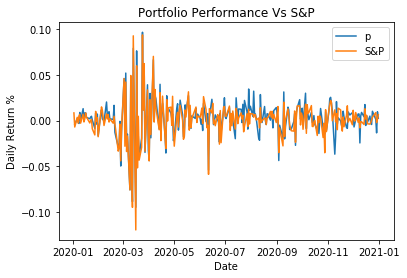

In [44]:
plt.title('Portfolio Performance Vs S&P')
plt.plot(tot_port_df['daily_return'],label='p')
plt.plot(sp_df['daily_return'],label='S&P')
plt.xlabel('Date')
plt.ylabel('Daily Return %')
plt.legend()
plt.show()

In [45]:
#find Portfolio Beta
def find_port_beta(sp_df,port_df):
    mult_df =pd.DataFrame()
    mult_df['GSPC']=sp_df['daily_return']
    mult_df['Portfolio']=port_df['daily_return']
    #print(mult_df)
    cov=mult_df.cov() * 252
    #print(cov)
    cov_vs_market = cov.iloc[0,1]
    #print(cov_vs_market)
    sp_var = mult_df['GSPC'].var() * 252
    beta = cov_vs_market / sp_var
    return beta

In [46]:
port_beta=find_port_beta(sp_df,tot_port_df)# Beta 1 means my portfolio will increase 1% if the market increase 1% ,beta 2 if market growth  5%, our portfolio will grow by 10%
port_beta

0.9149820337817834

In [47]:
#Calculating Alpha
#Alpha provides a measure of how well a portflio has performed . the CAPM assumes an Alpha of 0. good potfolio have a positive alpha, while poor have negative 
#alpha = R-Rf-Beta(Rm-rf)
risk_free_rate = 0.0125 # Approximate 10 year bond rate
port_alpha = roi_port-risk_free_rate - (port_beta*(sp_roi - risk_free_rate))
print('Portfolio Alpha : %2.2f %%' % (port_alpha*100))

Portfolio Alpha : 22.61 %


In [48]:
#so our portfolio outperformed than S&P in 2020

In [50]:
tot_port_df.to_csv('C:\\Users\\nafissaad\\Finance\\t')